In [1]:
%matplotlib widget 

from numpy.random import default_rng , MT19937
from matplotlib import pyplot as plt
import numpy as np



# a)

In [2]:
def random_num_gen(r0,a,c,m,N):
    rn=[r0]
    for n in range(1,N):
        rn_pl_one=(a*rn[-1]+c)% m      #the remainder of that division is returned which is smaller than m
        rn.append(rn_pl_one)
    random_floats = [r / m for r in rn]    # r/m is <1 since rn smaller than m
    return random_floats


# test

In [3]:
r0=0.8
a=27
c=892
m=123
N_test=10
ran_num_01=random_num_gen(r0,a,c,m,N_test)
print(ran_num_01)

[0.0065040650406504065, 0.4276422764227644, 0.7983739837398434, 0.8081300813009727, 0.0715447154514668, 0.18373983751480705, 0.21300813322499365, 0.0032521174000318225, 0.33983969012606247, 0.42770415372888976]


# b)

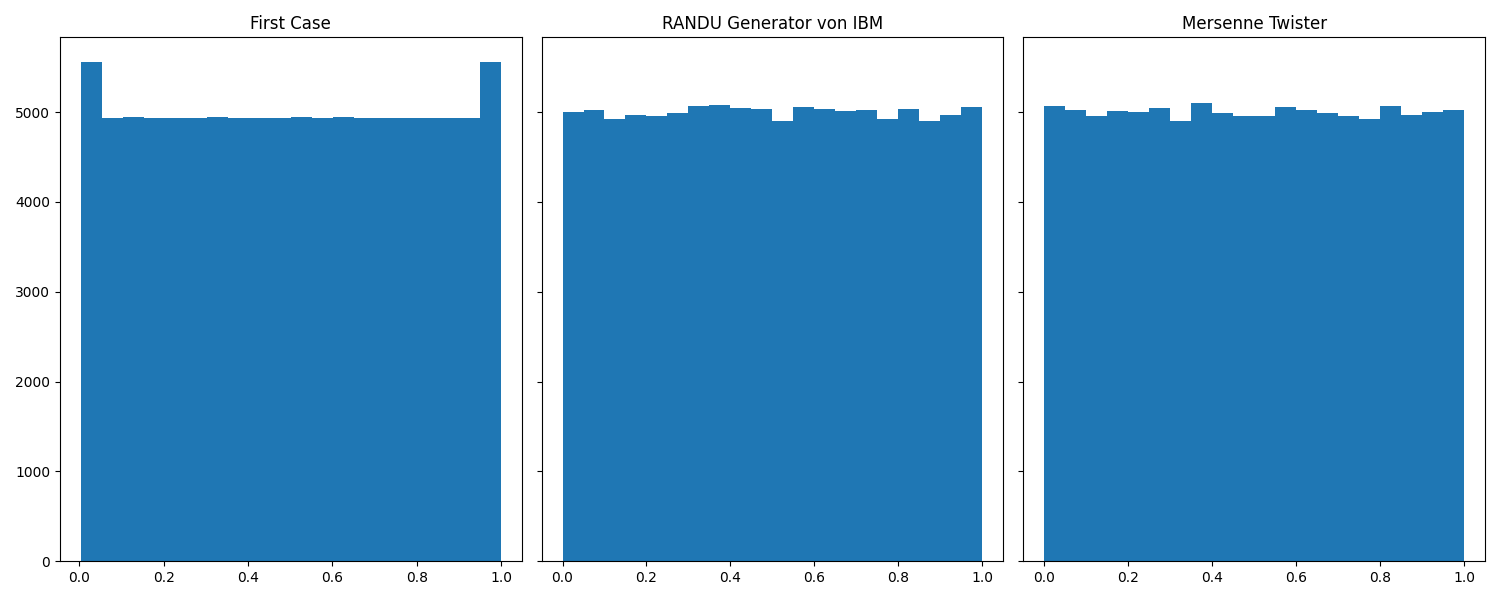

In [4]:
fig, ax =plt.subplots(1,3,figsize=(15,6), sharey=True, tight_layout=True)

N=10**5

r01=1234
a1=20
c1=120
m1=6075
ran_num_gen_first=random_num_gen(r01,a1,c1,m1,N)
ax[0].hist(ran_num_gen_first,bins=20)
ax[0].set_title("First Case")
r02=123456789
a2=65539
c2=0
m2=2**31
ran_num_gen_second=random_num_gen(r02,a2,c2,m2,N)
ax[1].hist(ran_num_gen_second,bins=20)
ax[1].set_title("RANDU Generator von IBM")

seed = 42
rng = default_rng ( MT19937 ( seed ))
r_n = rng.uniform ( 0 , 1 , N)
ax[2].hist(r_n,bins=20)
ax[2].set_title("Mersenne Twister")


plt.show()

# c)

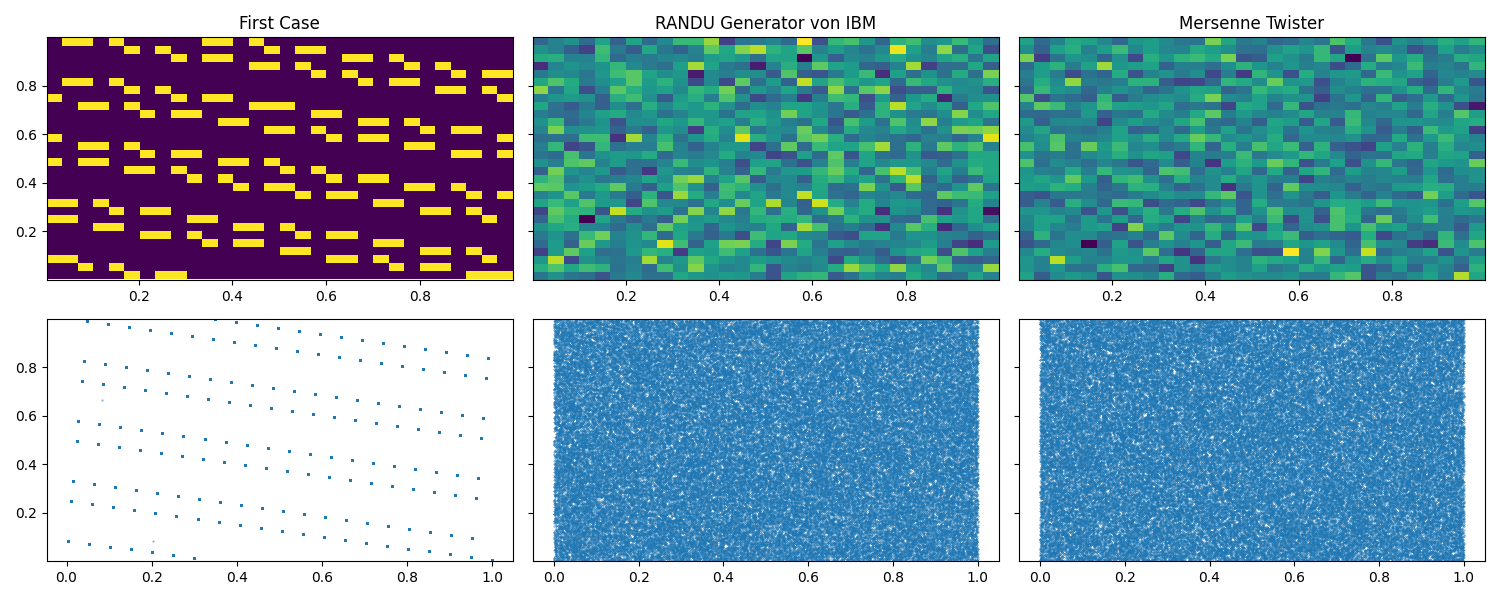

In [5]:
fig, ax =plt.subplots(2,3,figsize=(15,6), sharey=True, tight_layout=True)
bins=30
N=10**5
ran_num_gen_first=random_num_gen(r01,a1,c1,m1,N)
#ax[0].plot(ran_num_gen_first,".",markersize="1")
ax[0][0].hist2d(ran_num_gen_first[:-1],ran_num_gen_first[1:],bins=bins)
ax[1][0].scatter(ran_num_gen_first[:-1],ran_num_gen_first[1:],s=0.1)

ax[0][0].set_title("First Case")
ran_num_gen_second=random_num_gen(r02,a2,c2,m2,N)
#ax[1].plot(ran_num_gen_second,".",markersize="1")
ax[0][1].hist2d(ran_num_gen_second[:-1],ran_num_gen_second[1:],bins=bins)
ax[1][1].scatter(ran_num_gen_second[:-1],ran_num_gen_second[1:],s=0.1)

ax[0][1].set_title("RANDU Generator von IBM")

r_n = rng.uniform ( 0 , 1 , N)
#ax[2].plot(r_n,".",markersize="1")
ax[0][2].hist2d(r_n[:-1], r_n[1:],bins=bins)
ax[1][2].scatter(r_n[:-1], r_n[1:], s=0.1)


ax[0][2].set_title("Mersenne Twister")
plt.show()

# d)

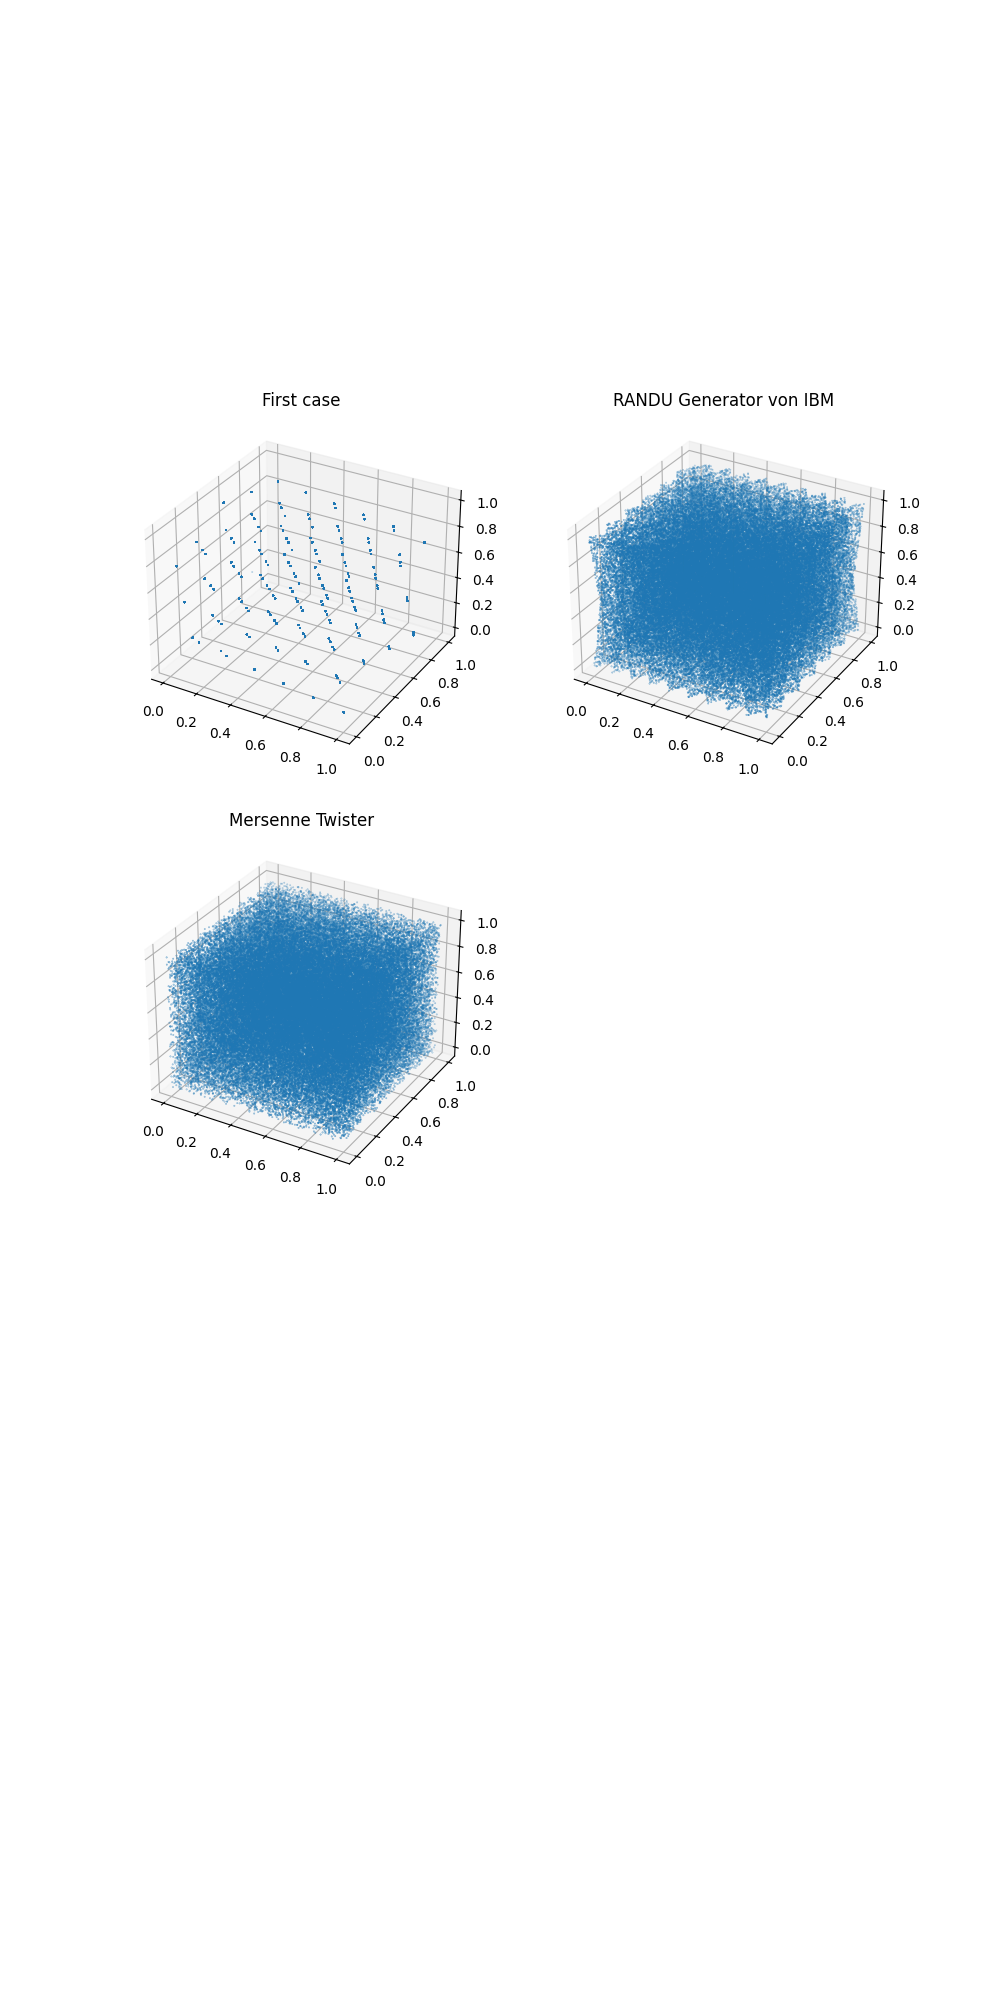

In [6]:
# set up the figure and Axes
fig = plt.figure(figsize=(10, 20))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(121, projection='3d')


top=ran_num_gen_first[:-1]

bottom = np.zeros_like(top)
width = depth = 1

ax1.scatter(ran_num_gen_first[:-2],ran_num_gen_first[1:-1], ran_num_gen_first[2:],s=0.1)
ax2.scatter(ran_num_gen_second[:-2],ran_num_gen_second[1:-1], ran_num_gen_second[2:],s=0.1)
ax3.scatter(r_n[:-2],r_n[1:-1], r_n[2:],s=0.1)


ax1.set_title("First case")
ax2.set_title("RANDU Generator von IBM")
ax3.set_title("Mersenne Twister")
plt.show()